In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("le.csv")

In [3]:
df.head(5)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [4]:
### Apply Linear Regression to the given dataset without splitting dataset

In [18]:
X = df["fertility"].values
X.shape

(139,)

In [19]:
Y = df["life"].values
Y.shape

(139,)

In [20]:
mean_x = np.mean(X)
print(mean_x)
mean_y = np.mean(Y)
print(mean_y)

3.005107913669065
69.60287769784172


In [21]:
n = len(X)
numer = 0
denom = 0
for i in range(n):
    numer += (X[i]-mean_x) * (Y[i]-mean_y)
    denom += (X[i]-mean_x) ** 2
b1 = numer/denom
b0 = mean_y - (b1 *mean_x)
print(b1)
print(b0)

-4.443878989782842
82.95721361742582


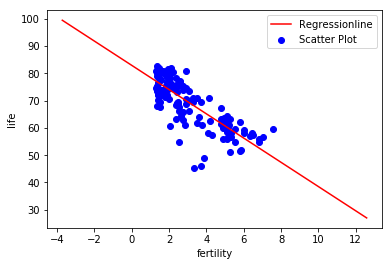

In [29]:
max_x = np.max(X) + 5
min_x = np.min(X) -5
x = np.linspace(min_x,max_x,1000)
y = b0 + b1*x
plt.plot(x,y,color = 'red',label='Regressionline')
plt.scatter(X,Y,c = 'Blue',label = 'Scatter Plot')
plt.xlabel('fertility')
plt.ylabel('life')
plt.legend(loc ='best')
plt.show()

In [32]:
#### Check the R squared score
y_pred = b0 + b1*X[2]
#print(y_pred)
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = b0 + b1*X[i]
    ss_tot += (Y[i]-mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score")
print(r2)

R2 Score
0.6192442167740038


In [42]:
from sklearn.linear_model import LinearRegression
X = df['fertility'].values.reshape(-1,1)
y = df['life'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
predictions = reg.predict(X)


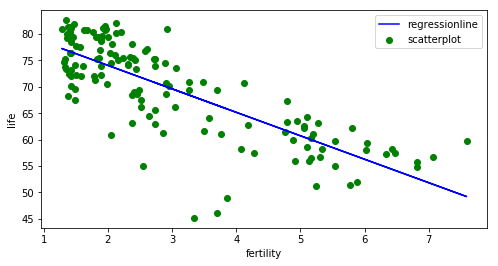

In [38]:
plt.figure(figsize = (8,4))
plt.scatter(df['fertility'],df['life'],c = 'green',label = 'scatterplot')
plt.plot(df['fertility'],predictions,c = 'blue',label = 'regressionline')
plt.xlabel("fertility")
plt.ylabel('life')
plt.legend(loc ='best')
plt.show()

In [43]:
## Check the R squared score
r2 = reg.score(X,y)
print("R2 score:",r2)

R2 score: 0.6192442167740035


In [45]:
##### Split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1 )


In [46]:
lr = LinearRegression()

In [47]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
train_score = lr.score(x_train,y_train)
train_score

0.6622771354590133

In [49]:
test_score = lr.score(x_test,y_test)
test_score

0.46803386950107906

In [50]:
r2 = reg.score(X,Y)
print("R2 score:",r2)

R2 score: 0.6192442167740035


In [51]:
## Finally take any value for fertility and predict the life.
predictions = reg.predict([[6.43]])
predictions

array([[54.38307171]])

In [52]:
predictions = reg.predict([[1.96]])
predictions

array([[74.2472108]])